In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
import time

import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

from Economics_utils import*

OBJECTIF:

Les données proviennent de 227 pays et contiennent des informations sur certains des facteurs importants qui régissent 
le développement économique. Il s'agit ici d'implémenter un modèle prédictif avec pour variable cible le PIB par habitant (GDP per capita). Il s'agit de l'indicateur clé du développement économique de tout pays. 

In [2]:
data = importer_affichage_dataset('countries_of_the_world.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
data["Region"].nunique()

11

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

DICTIONNAIRE DES DONNEES

|**Libellés variables**|**Description des variables**|**Type des données**|
|----------------------|-----------------------------|--------------------|
|**Country :**|Pays concerné par l'étude|Catégoriel|
|**Region :**|Région rattachée au pays étudié|Catégoriel|
|**Population :**|Effectif de la région|Numérique|
|**Area (sq. mi.) :**|Superficie en m²|Numérique|
|**Pop. Density (per sq. mi.) :**|Densité de population (par mile carré)|Catégoriel|
|**Coastline (coast/area ratio) :**|Littoral (rapport côte/superficie)|Catégoriel|
|**Net migration :**|Migration nette|Catégoriel|
|**Infant mortality (per 1000 births) :**|Mortalité infantile (pour 1000 naissances)|Catégoriel|
|**GDP ($ per capita) :**|PIB ($ par habitant)|Numérique|
|**Literacy (%) :**|Taux d'alphabétisation (%)|Catégoriel|
|**Phones (per 1000) :**|Téléphones (par 1000)|Catégoriel|
|**Arable (%) :**|Pourcentage terres Arables disponibles (%)|Catégoriel|
|**Crops (%) :**|Pourcentage d'espaces Cultivés (%)|Catégoriel|
|**Other (%) :**|Ratio autre|Catégoriel|
|**Climate :**|Climat|Catégoriel|
|**Birthrate :**|Taux de natalité|Catégoriel|
|**Deathrate :**|Taux de mortalité|Catégoriel|
|**Agriculture :**|Agriculture|Catégoriel|
|**Industry :**|Industrie|Catégoriel|
|**Service :**|Service|Catégoriel|

La plupart des variables catégorielles sont en réalité de type numérique et doivent de ce fait être converties. La déclaration de ces variables en type catégoriel tient de ce que le format de ce saisie des chiffre est inadéquat: la virgule doit être remplacée par un point.

In [5]:
data_process = data.copy()
data_process.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [6]:
# Liste des colonnes à modifier
columns_to_modify = data_process.columns.difference(['Country', 'Region', 'Population', 'Area (sq. mi.)'])

# Remplacer les virgules par des points dans les colonnes numériques
data_process[columns_to_modify] = data_process[columns_to_modify].replace(',', '.', regex=True)

# Convertir les colonnes en types numériques appropriés
data_process[columns_to_modify] = data_process[columns_to_modify].apply(pd.to_numeric)


In [7]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [8]:
data_process.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [9]:
data_process.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Plusieurs valeurs manquantes constatées

In [10]:
# Pourcentage de valeurs nulles dans chaque colonne
pourcentages_nuls = (data_process.isnull().sum() / len(data_process)) * 100

print("Pourcentage de valeurs manquantes dans chaque colonne :\n", pourcentages_nuls)

Pourcentage de valeurs manquantes dans chaque colonne :
 Country                               0.000000
Region                                0.000000
Population                            0.000000
Area (sq. mi.)                        0.000000
Pop. Density (per sq. mi.)            0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dty

Supprimons les lignes avec valeurs manquantes

In [11]:
# Supprimer les lignes avec des valeurs nulles ou NaN
data_sans_nuls = data_process.dropna()
data_sans_nuls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    float64
 5   Coastline (coast/area ratio)        179 non-null    float64
 6   Net migration                       179 non-null    float64
 7   Infant mortality (per 1000 births)  179 non-null    float64
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    float64
 10  Phones (per 1000)                   179 non-null    float64
 11  Arable (%)                          179 non-null  

In [12]:
data_sans_nuls.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [13]:
# Calculer le nombre de lignes dans le DataFrame initial
nb_initial_rows = len(data_process)

# Calculer le nombre de lignes après suppression des valeurs nulles
nb_not_nuls_rows = len(data_sans_nuls)

# Calculer le pourcentage de pertes de données
ratio_loss = round(((nb_initial_rows - nb_not_nuls_rows) / nb_initial_rows) * 100, 2)

# Créer un tableau pour afficher les données
tableau = [
    ["Nombre de lignes initiales", nb_initial_rows],
    ["Nombre de lignes restantes", nb_not_nuls_rows],
    ["Ratio pertes de données", ratio_loss]
]

# Afficher le tableau
print(tabulate(tableau, headers=["Description", "Valeur"], tablefmt="grid"))

+----------------------------+----------+
| Description                |   Valeur |
+============================+==========+
| Nombre de lignes initiales |   227    |
+----------------------------+----------+
| Nombre de lignes restantes |   179    |
+----------------------------+----------+
| Ratio pertes de données    |    21.15 |
+----------------------------+----------+


Nous ne pouvons prendre la décision de supprimer les lignes ayant des valeurs nulles compe tenu de l'important ratio de données à supprimer, soit un peu plus de 21 %. Nous optons ainsi pour un remplissage de ces données manquantes par les valeurs médianes.

In [14]:
# Calculer la somme des valeurs manquantes pour chaque colonne
sommes_valeurs_manquantes = data_process.isna().sum()

# Sélectionner les colonnes avec des valeurs manquantes
colonnes_avec_valeurs_manquantes = sommes_valeurs_manquantes[sommes_valeurs_manquantes != 0].index

# Remplacer les valeurs manquantes par la médiane de chaque colonne avec des valeurs manquantes
for col in colonnes_avec_valeurs_manquantes:
    mediane_col = data_process[col].median()
    data_process[col].fillna(mediane_col, inplace=True)

In [15]:
# Vérification des valeurs manquantes
data_process.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [16]:
# Formater les titres des colonnes
data_process = data_process.rename(columns=lambda x: x.replace(' ', '_'))   # Remplacer les espaces par des underscores

data_process.isna().sum()

Country                               0
Region                                0
Population                            0
Area_(sq._mi.)                        0
Pop._Density_(per_sq._mi.)            0
Coastline_(coast/area_ratio)          0
Net_migration                         0
Infant_mortality_(per_1000_births)    0
GDP_($_per_capita)                    0
Literacy_(%)                          0
Phones_(per_1000)                     0
Arable_(%)                            0
Crops_(%)                             0
Other_(%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

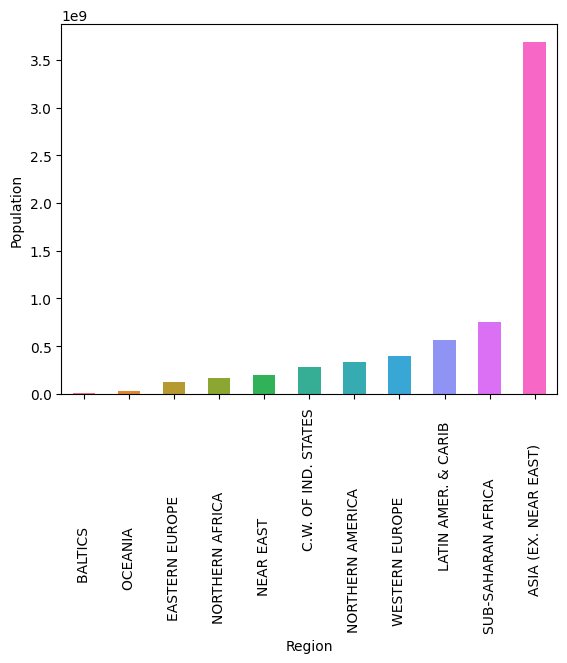

In [17]:
plot_bar_chart_region(data_process, 'Region', 'Population')

Le graphique ci-dessus illustre, sur la base des données étudiées, que la région Asiatique excluant le proche-orient est la zone géographique la plus peuplée avec plus de 3.5 milliards d'habitants, tandis que la région des Baltiques est celle qui enregistre le moins d'habittants comparativement aux autres régions de la présente étude.

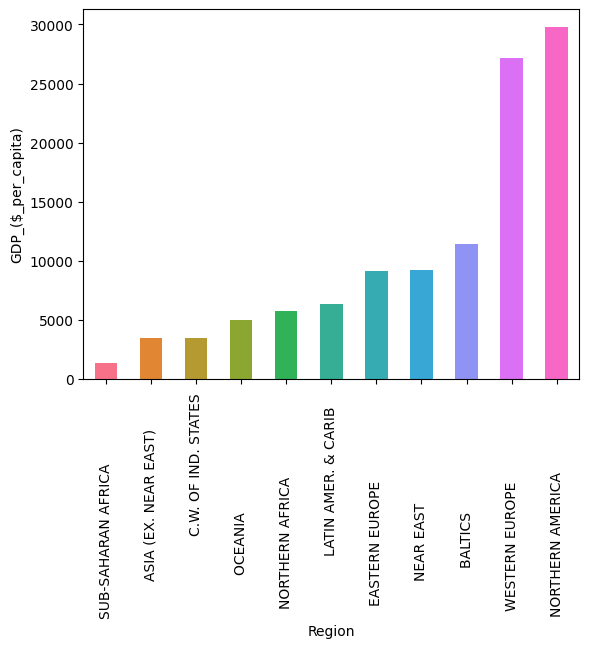

In [18]:
plot_bar_chart_gdp(data_process, 'Region', 'GDP_($_per_capita)')

Selon les données de l'étude, l'Amérique du nord est la région qui présente le PIB médian (calcul utilisé pour la production de ce graphique) par habitant le plus élevé suivie de l'Europe de l'Ouest. La région Afrique Sub-Saharienne est la dernière en la matière.

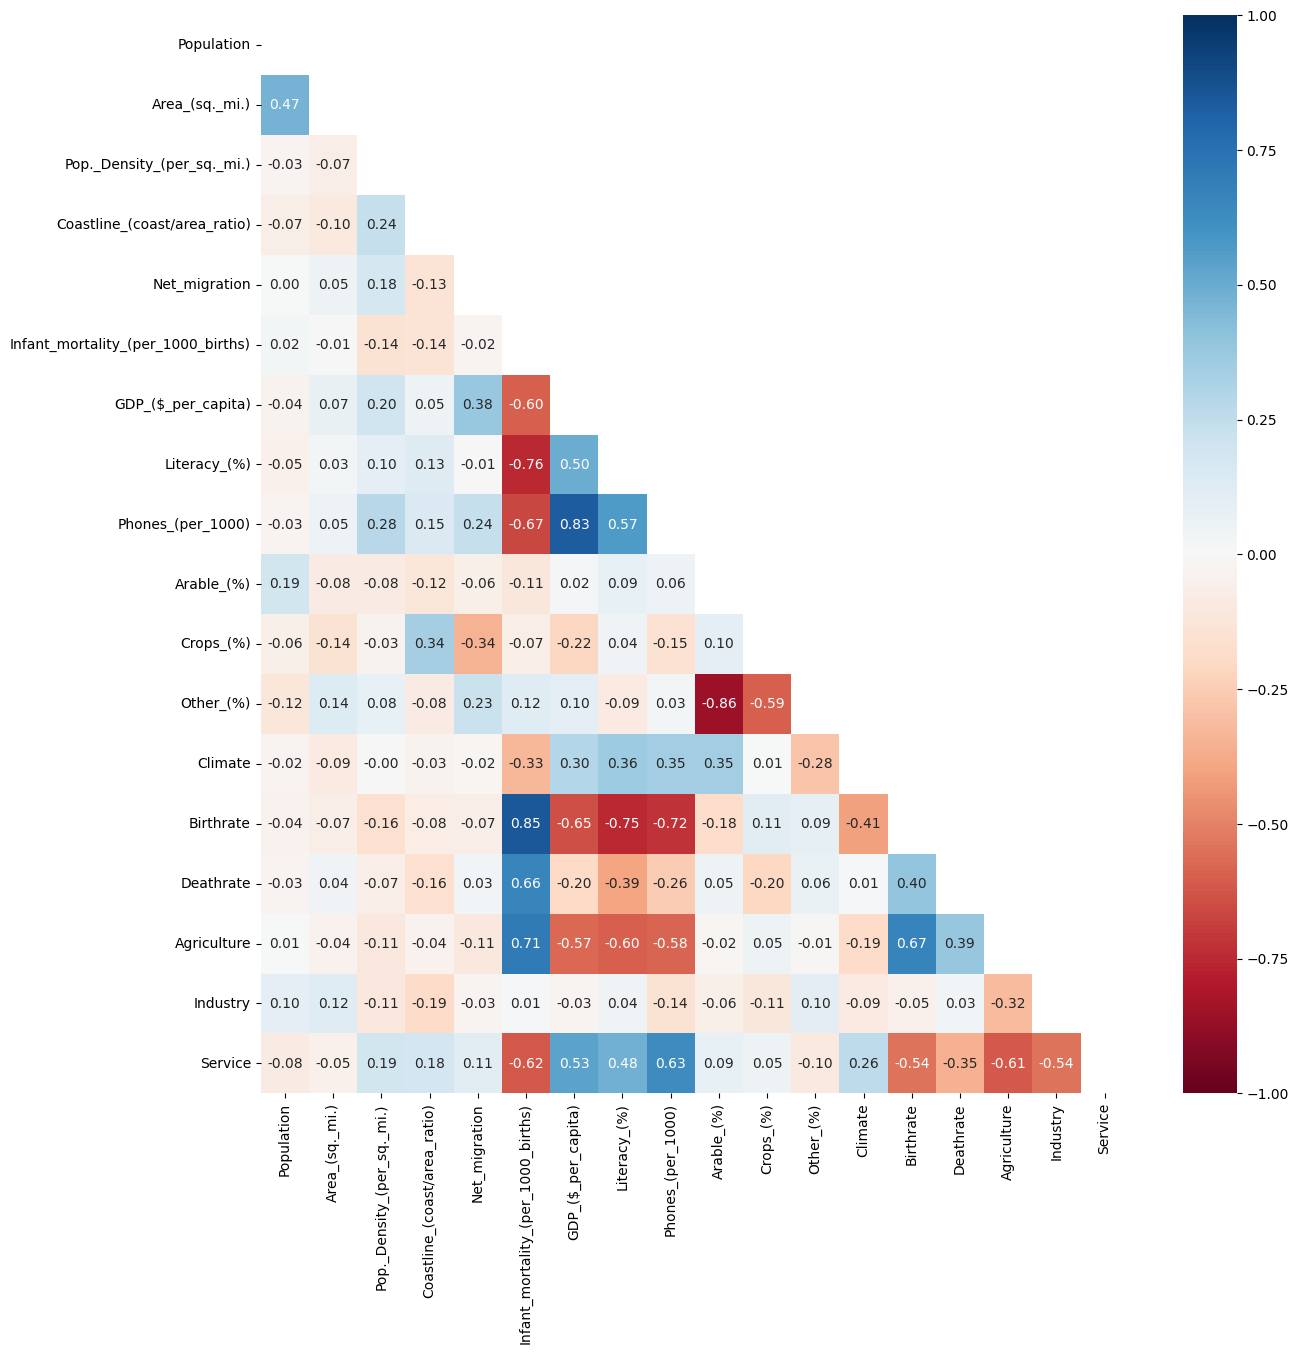

In [19]:
# Affichage de la matrice des corrélations
plot_numeric_heatmap(data_process)

la matrice des corrélations ci-dessus révèle que les variables qui contribuent à l'accroissement du PIB sont les services, l'accès des popuations aux télécommunications et le taux d'alphabétisation.

In [20]:
# Séparation de la variable expliquée Y des variables explicatives X
X = data_process.drop('GDP_($_per_capita)', axis = 1)
y = data_process['GDP_($_per_capita)']

In [21]:
# Sélection des colonnes catégorielles
categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
categorical_vars

['Country', 'Region']

In [22]:
# Sélection des colonnes numériques
numerical_vars = [nv for nv in X.columns if nv not in categorical_vars]
numerical_vars

['Population',
 'Area_(sq._mi.)',
 'Pop._Density_(per_sq._mi.)',
 'Coastline_(coast/area_ratio)',
 'Net_migration',
 'Infant_mortality_(per_1000_births)',
 'Literacy_(%)',
 'Phones_(per_1000)',
 'Arable_(%)',
 'Crops_(%)',
 'Other_(%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [23]:
categorical_vars.pop(0)
categorical_vars

['Region']

In [24]:
regression_pipelines = create_regression_pipeline(categorical_vars, numerical_vars)

In [25]:
X_typed = pd.concat([data_process[categorical_vars], data_process[numerical_vars]], axis=1)

In [26]:
X_typed_data_val = X_typed.copy()
X_typed_no_data_val = X_typed.copy()

In [27]:
seed = 42
X_train_no_val, X_test_no_val, y_train_no_val, y_test_no_val = train_test_split(X_typed_no_data_val, y, test_size=0.3, random_state = seed)

In [28]:
train_and_evaluate_pipeline(regression_pipelines, X_train_no_val, y_train_no_val, X_test_no_val, y_test_no_val)

,Model,Train MSE,Test MSE,Train R2,Test R2
0,LinearRegression,2.005836e+07,3.267530e+07,0.803437,0.659190
1,RandomForestRegressor,3.408791e+06,8.134701e+06,0.966595,0.915153
2,XgboostRegressor,1.053881e-03,1.736429e+07,1.000000,0.818887
